In [19]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt

In [7]:
def power_law_fit(y_data, x_data=None):
    if x_data is None:
        x_data = np.arange(1, len(y_data) + 1)
    log_y = np.log(y_data)
    log_x = np.log(x_data)
    slope, intercept = np.polyfit(log_x, log_y, 1)
    return slope, intercept

In [8]:
import h5py
data_dir = '/home/om2382/datasets/'
data_name = '41686638'
with h5py.File(os.path.join(data_dir, data_name), 'r') as f:
    r = f['processing']['ophys']['DfOverF']['RoiResponseSeries']['data'][:,:]
    #r = r - r.mean(0)
#cov = np.einsum('ti, tj -> ij', r, r) / (r.shape[0] - 1)
#eigs, vecs = np.linalg.eig(cov)

In [9]:
cov = np.einsum('ti, tj -> ij', r, r) / (r.shape[0] - 1)
eigs, vecs = np.linalg.eig(cov)

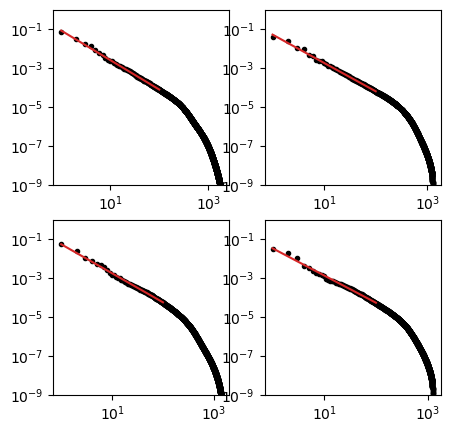

In [24]:
import h5py
data_dir = '/home/om2382/datasets/flygenvalues_data/'
n_fig = len(os.listdir(data_dir))
fig, ax = plt.subplots(2, 2, figsize=(5, 5))
eigs_dict = {}
for i_fly, data_name in enumerate(os.listdir(data_dir)):
    with h5py.File(os.path.join(data_dir, data_name), 'r') as f:
        r = f['processing']['ophys']['DfOverF']['RoiResponseSeries']['data'][:,:]
    cov = np.einsum('ti, tj -> ij', r, r) / (r.shape[0] - 1)
    eigs, vecs = np.linalg.eig(cov)
    eigs = np.array(sorted(np.abs(eigs))[::-1])
    eigs_dict[i_fly] = eigs
    n_fit = 100
    slope, intercept = power_law_fit(eigs[:n_fit])
    x = np.arange(1, n_fit + 1)
    ax[i_fly//2, i_fly%2].plot(np.arange(1, len(eigs) + 1), eigs, '.', color='k')
    ax[i_fly//2, i_fly%2].plot(x, np.exp(intercept) * x**slope, color='C3')
    ax[i_fly//2, i_fly%2].set_xscale('log')
    ax[i_fly//2, i_fly%2].set_yscale('log')
    ax[i_fly//2, i_fly%2].set_ylim([1e-9, 1e0])

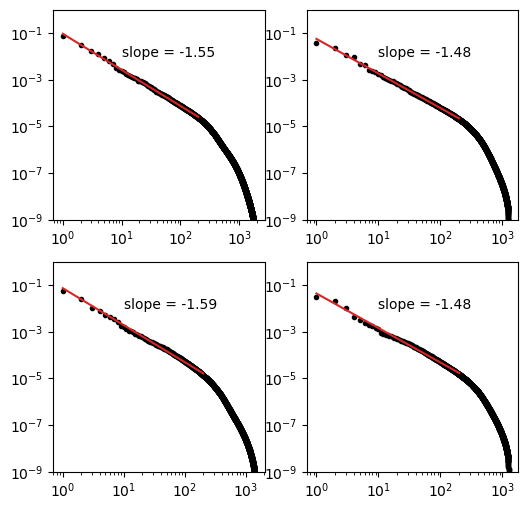

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(6, 6))
for i_fly, data_name in enumerate(os.listdir(data_dir)):
    eigs = eigs_dict[i_fly]
    n_fit = 200
    slope, intercept = power_law_fit(eigs[:n_fit])
    x = np.arange(1, n_fit + 1)
    ax[i_fly//2, i_fly%2].plot(np.arange(1, len(eigs) + 1), eigs, '.', color='k')
    ax[i_fly//2, i_fly%2].plot(x, np.exp(intercept) * x**slope, color='C3')
    ax[i_fly//2, i_fly%2].set_xscale('log')
    ax[i_fly//2, i_fly%2].set_yscale('log')
    ax[i_fly//2, i_fly%2].set_ylim([1e-9, 1e0])
    ax[i_fly//2, i_fly%2].annotate('slope = {}'.format(np.round(slope,2)), xy=[10, 0.01])

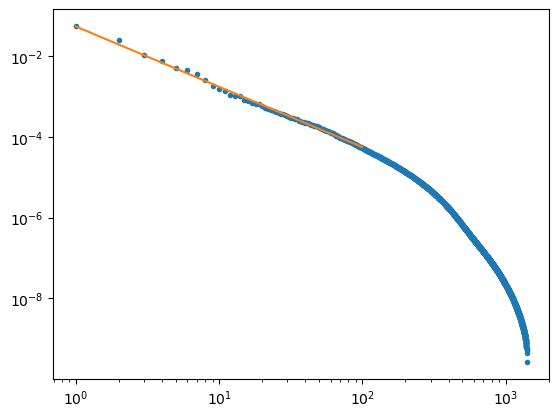

In [22]:
eigs = np.array(sorted(np.abs(eigs))[::-1])
n_fit = 100
slope, intercept = power_law_fit(eigs[:n_fit])
x = np.arange(1, n_fit + 1)
plt.plot(np.arange(1, len(eigs) + 1), eigs, '.')
plt.plot(x, np.exp(intercept) * x**slope)
plt.xscale('log')
plt.yscale('log')

In [17]:
intercept

-2.9091799011935353

In [3]:
r = r - r.mean(0)
import sys
sys.path.append('/home/om2382/scaling_analysis/')
from PopulationCoding.PopulationCoding.dimred import SVCA
cov_neur, var_neur, u, v, _ = SVCA(r.T)
cov = np.einsum('ti, tj -> ij', r, r) / (r.shape[0] - 1)
eigs, vecs = np.linalg.eig(cov)

Fitted power law: y = 143.545 * x^-1.545


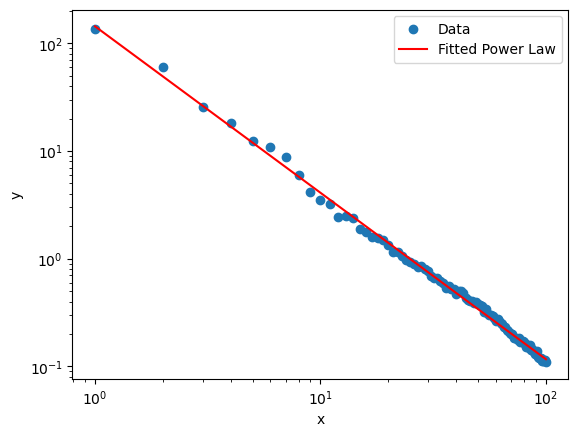

In [11]:
# Define the power law function
from scipy.optimize import curve_fit
def power_law(x, a, b):
    return a * np.power(x, b)

# Generate some synthetic data (for demonstration purposes)
np.random.seed(0)
x_data = np.arange(1, 100 + 1)
y_data = np.abs(cov_neur[:100])

# Log-log transformation
log_x_data = np.log(x_data)
log_y_data = np.log(y_data)

# Define a linear function for fitting in log-log space
def linear_fit(x, m, c):
    return m * x + c

# Fit the data in log-log space
params, covariance = curve_fit(linear_fit, log_x_data, log_y_data)
slope, intercept = params

# Extract the power law parameters
a = np.exp(intercept)
b = slope

# Print the results
print(f"Fitted power law: y = {a:.3f} * x^{b:.3f}")

# Plot the original data and the fitted curve
plt.figure()
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, power_law(x_data, a, b), color='red', label='Fitted Power Law')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Fitted power law: y = 0.055 * x^-1.493


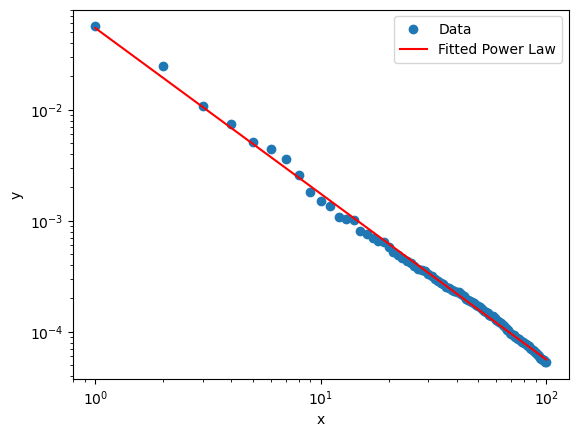

In [13]:
# Define the power law function
from scipy.optimize import curve_fit
def power_law(x, a, b):
    return a * np.power(x, b)

# Generate some synthetic data (for demonstration purposes)
np.random.seed(0)
x_data = np.arange(1, 100 + 1)
y_data = sorted(np.abs(eigs))[::-1][:100]

# Log-log transformation
log_x_data = np.log(x_data)
log_y_data = np.log(y_data)

# Define a linear function for fitting in log-log space
def linear_fit(x, m, c):
    return m * x + c

# Fit the data in log-log space
params, covariance = curve_fit(linear_fit, log_x_data, log_y_data)
slope, intercept = params

# Extract the power law parameters
a = np.exp(intercept)
b = slope

# Print the results
print(f"Fitted power law: y = {a:.3f} * x^{b:.3f}")

# Plot the original data and the fitted curve
plt.figure()
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, power_law(x_data, a, b), color='red', label='Fitted Power Law')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Fitted power law: y = 4.060 * x^-2.409


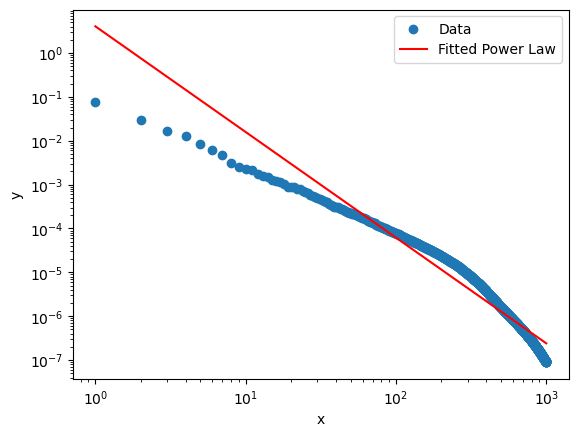

Fitted power law: y = 7.145 * x^-2.565


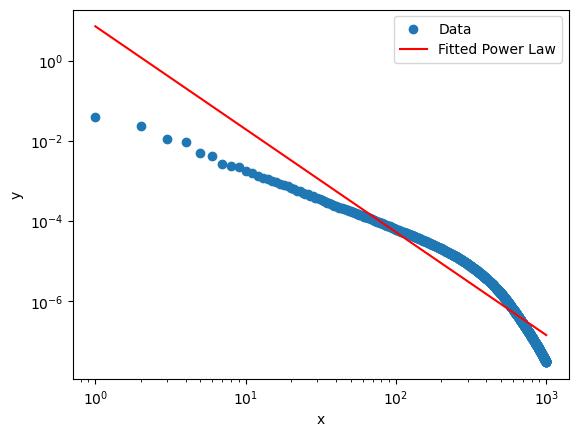

Fitted power law: y = 10.002 * x^-2.715


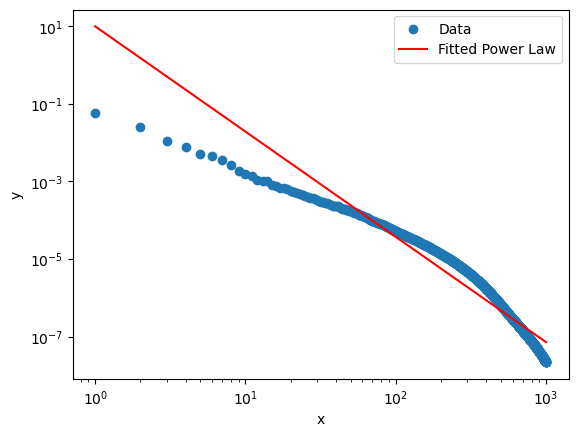

Fitted power law: y = 3.586 * x^-2.477


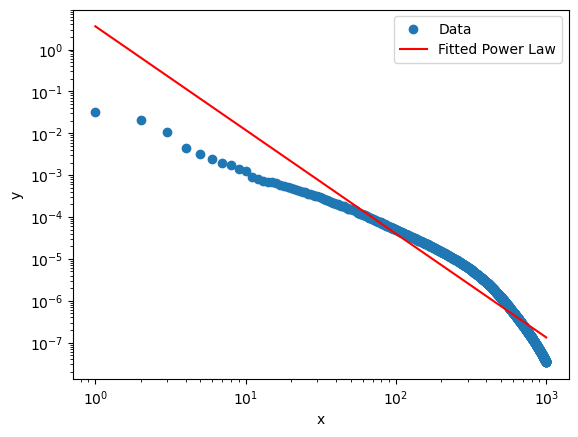

In [3]:
import h5py
data_dir = '/home/om2382/datasets/flygenvalues_data/'
for data_name in os.listdir(data_dir):
    with h5py.File(os.path.join(data_dir, data_name), 'r') as f:
        r = f['processing']['ophys']['DfOverF']['RoiResponseSeries']['data'][:,:]
    cov = np.einsum('ti, tj -> ij', r, r) / (r.shape[0] - 1)
    eigs, vecs = np.linalg.eig(cov)
    
    from scipy.optimize import curve_fit

    eigs = np.array(sorted(np.abs(eigs))[::-1])

    # Define the power law function
    def power_law(x, a, b):
        return a * np.power(x, b)

    # Generate some synthetic data (for demonstration purposes)
    np.random.seed(0)
    x_data = np.arange(1, 1000 + 1)
    y_data = eigs[:1000]

    # Log-log transformation
    log_x_data = np.log(x_data)
    log_y_data = np.log(y_data)

    # Define a linear function for fitting in log-log space
    def linear_fit(x, m, c):
        return m * x + c

    # Fit the data in log-log space
    params, covariance = curve_fit(linear_fit, log_x_data, log_y_data)
    slope, intercept = params

    # Extract the power law parameters
    a = np.exp(intercept)
    b = slope

    # Print the results
    print(f"Fitted power law: y = {a:.3f} * x^{b:.3f}")

    # Plot the original data and the fitted curve
    plt.figure()
    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_data, power_law(x_data, a, b), color='red', label='Fitted Power Law')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

Fitted power law: y = 0.014 * x^-1.595


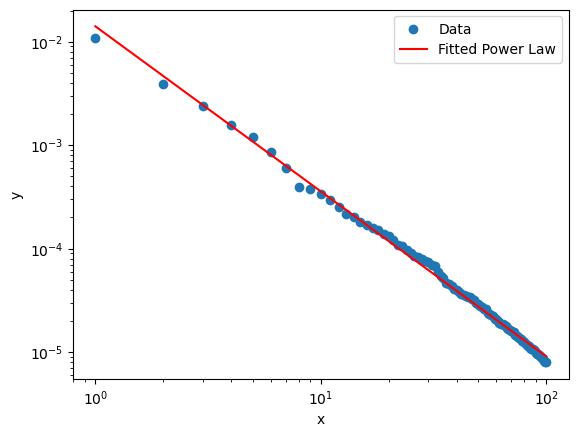

Fitted power law: y = 0.024 * x^-1.536


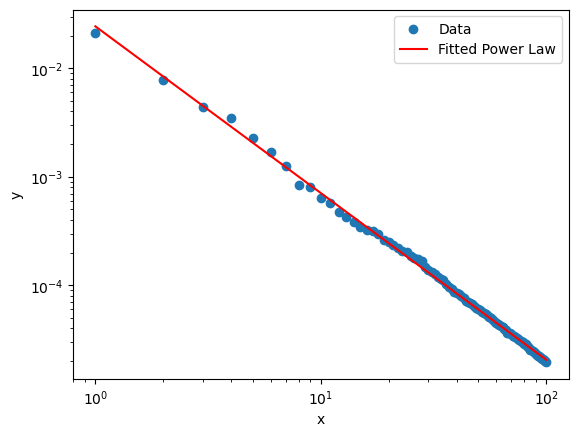

Fitted power law: y = 0.047 * x^-1.529


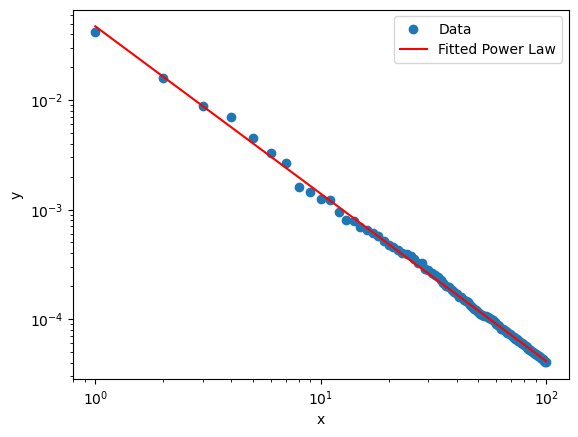

In [6]:
import h5py
data_dir = '/home/om2382/datasets/flygenvalues_data/'
data_name = os.listdir(data_dir)[0]
for n_sample in [250, 500, 1000]:
    with h5py.File(os.path.join(data_dir, data_name), 'r') as f:
        r = f['processing']['ophys']['DfOverF']['RoiResponseSeries']['data'][:,:]
        i_sample = np.random.choice(list(range(r.shape[1])), size=n_sample, replace=False)
        r = r[:, i_sample]
    cov = np.einsum('ti, tj -> ij', r, r) / (r.shape[0] - 1)
    eigs, vecs = np.linalg.eig(cov)
    
    from scipy.optimize import curve_fit

    eigs = np.array(sorted(np.abs(eigs))[::-1])

    # Define the power law function
    def power_law(x, a, b):
        return a * np.power(x, b)

    # Generate some synthetic data (for demonstration purposes)
    np.random.seed(0)
    x_data = np.arange(1, 100 + 1)
    y_data = eigs[:100]

    # Log-log transformation
    log_x_data = np.log(x_data)
    log_y_data = np.log(y_data)

    # Define a linear function for fitting in log-log space
    def linear_fit(x, m, c):
        return m * x + c

    # Fit the data in log-log space
    params, covariance = curve_fit(linear_fit, log_x_data, log_y_data)
    slope, intercept = params

    # Extract the power law parameters
    a = np.exp(intercept)
    b = slope

    # Print the results
    print(f"Fitted power law: y = {a:.3f} * x^{b:.3f}")

    # Plot the original data and the fitted curve
    plt.figure()
    plt.scatter(x_data, y_data, label='Data')
    plt.plot(x_data, power_law(x_data, a, b), color='red', label='Fitted Power Law')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

Fitted power law: y = 0.012 * x^-1.519
Fitted power law: y = 0.023 * x^-1.517
Fitted power law: y = 0.046 * x^-1.518


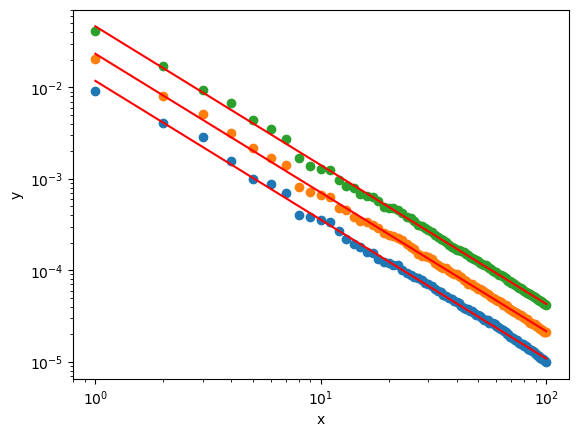

In [9]:
import h5py
data_dir = '/home/om2382/datasets/flygenvalues_data/'
data_name = os.listdir(data_dir)[0]
for n_sample in [250, 500, 1000]:
    with h5py.File(os.path.join(data_dir, data_name), 'r') as f:
        r = f['processing']['ophys']['DfOverF']['RoiResponseSeries']['data'][:,:]
    cov = np.einsum('ti, tj -> ij', r, r) / (r.shape[0] - 1)
    eigs_og, vecs_og = np.linalg.eig(cov)
    vecs_rand = np.linalg.qr(np.random.normal(0, 1, cov.shape))[0]
    cov_rand = vecs_rand.dot(np.diag(eigs_og)).dot(vecs_rand.T)
    i_sample = np.random.choice(list(range(r.shape[1])), size=n_sample, replace=False)
    cov_ = cov_rand[i_sample,:][:,i_sample]
    eigs, vecs = np.linalg.eig(cov_)
    
    from scipy.optimize import curve_fit

    eigs = np.array(sorted(np.abs(eigs))[::-1])

    # Define the power law function
    def power_law(x, a, b):
        return a * np.power(x, b)

    # Generate some synthetic data (for demonstration purposes)
    np.random.seed(0)
    x_data = np.arange(1, 100 + 1)
    y_data = eigs[:100]

    # Log-log transformation
    log_x_data = np.log(x_data)
    log_y_data = np.log(y_data)

    # Define a linear function for fitting in log-log space
    def linear_fit(x, m, c):
        return m * x + c

    # Fit the data in log-log space
    params, covariance = curve_fit(linear_fit, log_x_data, log_y_data)
    slope, intercept = params

    # Extract the power law parameters
    a = np.exp(intercept)
    b = slope

    # Print the results
    print(f"Fitted power law: y = {a:.3f} * x^{b:.3f}")

    # Plot the original data and the fitted curve
    #plt.figure()
    plt.scatter(x_data, y_data, label='Data {}'.format(n_sample))
    plt.plot(x_data, power_law(x_data, a, b), color='red', label='Fitted Power Law {}'.format(n_sample))
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.legend()
    #plt.show()

In [9]:
os.listdir(data_dir)

['2019_04_22_fly3.nwb',
 '2019_04_29_fly1.nwb',
 '2019_04_26_fly1.nwb',
 '2019_05_07_fly1.nwb']

In [12]:
data_name = os.listdir(data_dir)[2]
with h5py.File(os.path.join(data_dir, data_name), 'r') as f:
    r = f['processing']['ophys']['DfOverF']['RoiResponseSeries']['data'][:,:]
r.shape

(9698, 1403)

In [7]:
np.savez('/home/om2382/datasets/41686638_dfoverf_mat.npz', r=r)

In [6]:
with open('/home/om2382/datasets/41686638_dfoverf_mat.npz')

(9698, 1403)

In [4]:
cov = np.einsum('ti, tj -> ij', r, r) / (r.shape[0] - 1)

In [5]:
eigs, vecs = np.linalg.eig(cov)

In [ ]:
#find out cell identities?
#do subsampling stuff?

In [7]:
r.shape

(9698, 1403)

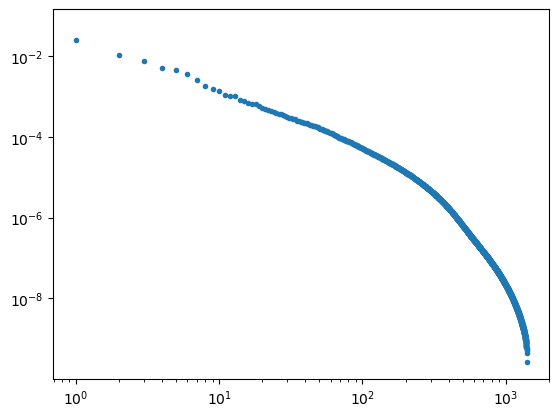

In [6]:
plt.plot(sorted(np.abs(eigs))[::-1], '.')
plt.xscale('log')
plt.yscale('log')

In [6]:
eigs.sum()**2/(eigs**2).sum()

5.157586894105887

Fitted power law: y = 0.034 * x^-1.399


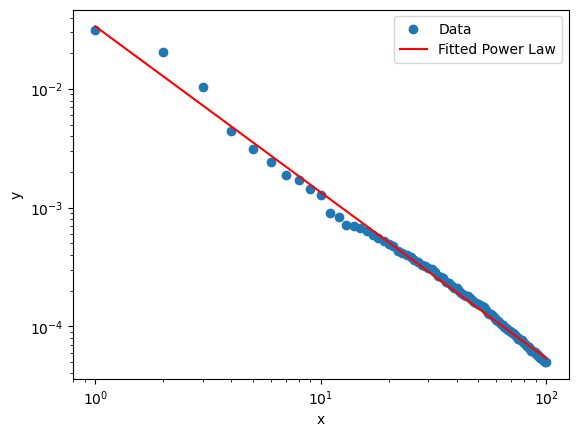

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

eigs = np.array(sorted(np.abs(eigs))[::-1])

# Define the power law function
def power_law(x, a, b):
    return a * np.power(x, b)

# Generate some synthetic data (for demonstration purposes)
np.random.seed(0)
x_data = np.arange(1, 100 + 1)
y_data = eigs[:100]

# Log-log transformation
log_x_data = np.log(x_data)
log_y_data = np.log(y_data)

# Define a linear function for fitting in log-log space
def linear_fit(x, m, c):
    return m * x + c

# Fit the data in log-log space
params, covariance = curve_fit(linear_fit, log_x_data, log_y_data)
slope, intercept = params

# Extract the power law parameters
a = np.exp(intercept)
b = slope

# Print the results
print(f"Fitted power law: y = {a:.3f} * x^{b:.3f}")

# Plot the original data and the fitted curve
plt.figure()
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, power_law(x_data, a, b), color='red', label='Fitted Power Law')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [21]:
np.isnan(eigs).sum()

0